# Data Analysis with Python

## Skoda used Car Analysis
Prepared By: Suman Biswas
<br>Scientific Officer (Statistics)
<br>Bangladesh Agricultural Research Institute (BARI)
<br>Gazipur-1701, Bangladesh

#### Obejctives
Exploratory Data Analysis using groupby/pivot_table and barplot (total 9 barplots), based on model, transmission, and fuelType to find out:
- What are the top 5 selling car models/transmission/fuelType in the dataset?
- What's the average selling price of the top 5 selling car models/transmission/fuelType?
- What's the total sale of the top 5 selling car models/transmission/fuelType?

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

#### Load Data

In [18]:
data=pd.read_csv('skoda.csv')

display(data.head(10)) # Display first 10 rows of the dataset

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,40.9,1.5
5,Yeti Outdoor,2017,13250,Automatic,47005,Diesel,51.4,2.0
6,Superb,2019,15250,Manual,14850,Petrol,40.9,1.5
7,Octavia,2019,18950,Automatic,5850,Diesel,50.4,2.0
8,Kodiaq,2019,29900,Automatic,2633,Petrol,31.4,2.0
9,Octavia,2017,18990,Manual,20000,Petrol,43.5,2.0


#### Data aggregation and preprocessing before visualization by model 

In [49]:
#Group By model
data_model = data.groupby('model')['price'].agg(['count', 'mean', 'sum'])

# sort the dataframe based on the column 'count'
data_model = data_model.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
data_model['percent_of_cars'] = (data_model['count']/data_model['count'].sum())*100

# convert the 'sum' column in millions
data_model['sum'] = data_model['sum']/1000000

# keep up to two decimal points
data_model = data_model.round(2)

# remove the 'count' column
data_model = data_model.drop('count', axis=1)

display(data_model)

,mean,sum,percent_of_cars
model,,,
Fabia,9906.50,15.56,25.07
Octavia,13991.96,20.67,23.57
Superb,18898.26,14.95,12.62
Kodiaq,25652.37,12.11,7.53
Citigo,6925.56,3.26,7.50
Yeti Outdoor,12737.09,5.83,7.31
Karoq,21067.55,8.22,6.22
Scala,16988.61,3.26,3.06
Rapid,8277.61,1.26,2.43


#### Barplot: Percentage of cars, Average and Total selling price of cars by model

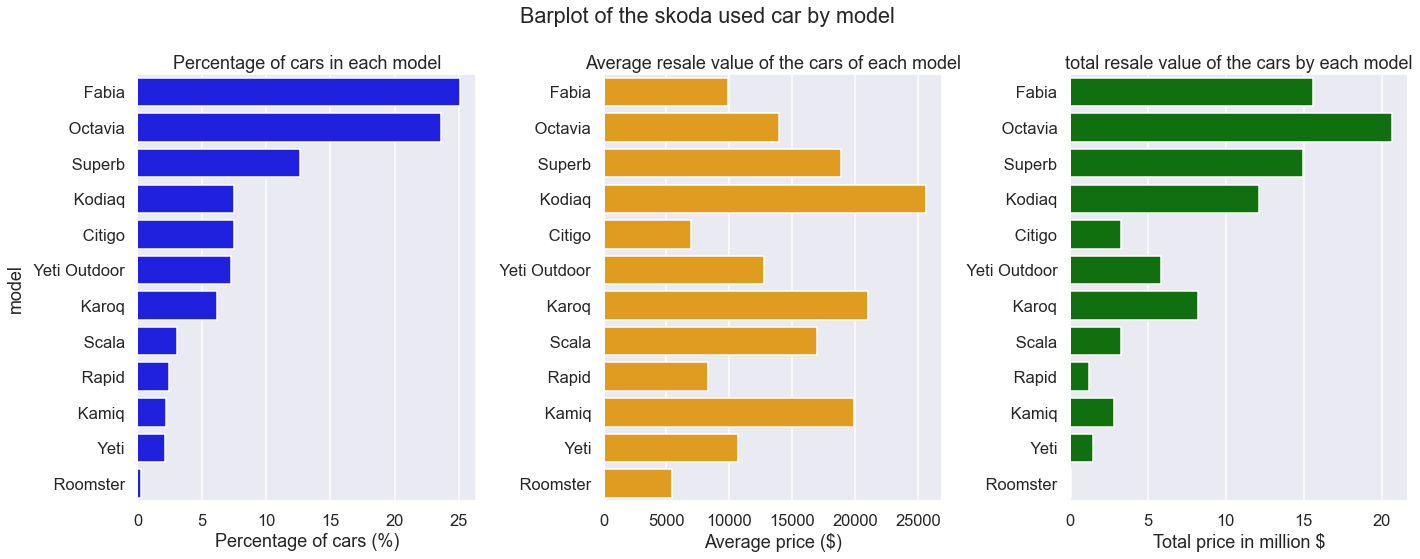

In [39]:
plt.figure(figsize=(20,8))

##### By model
plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=data_model.index, data=data_model, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")


plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=data_model.index, data=data_model, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=data_model.index, data=data_model, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the skoda used car by model")
plt.tight_layout()
plt.show()

##### Observation:
- Top 5 selling car models are Fabia (25%), Octavia (24%), Superb (13%), Kodiaq (8%) and Citigo (8%)
- Top 5 average selling price car models are Kodiaq	(\$25,652), Karoq (\\$21,068), Kamiq (\$19,904), Superb (\\$18898) and Scala (\ $16988)

- Top 5 total selling price car models are Octavia ($ 20.67M), Fabia ($ 15.56M), Superb ($ 14.95M), Kodiaq ($ 12.11M) and Karoq ($ 8.22M)

#### Data aggregation and preprocessing before visualization by transmission

In [50]:
#Group By transmission
data_trans = data.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

# sort the dataframe based on the column 'count'
data_trans = data_trans.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
data_trans['percent_of_cars'] = (data_trans['count']/data_trans['count'].sum())*100

# convert the 'sum' column in millions
data_trans['sum'] = data_trans['sum']/1000000

# keep up to two decimal points
data_trans = data_trans.round(2)

# remove the 'count' column
data_trans = data_trans.drop('count', axis=1)

display(data_trans)

,mean,sum,percent_of_cars
transmission,,,
Manual,11658.52,43.77,59.90
Semi-Auto,16285.11,22.93,22.47
Automatic,20609.33,22.75,17.62
Other,15999.00,0.02,0.02


##### Barplot: Percentage of cars, Average and Total selling price of cars by transmission

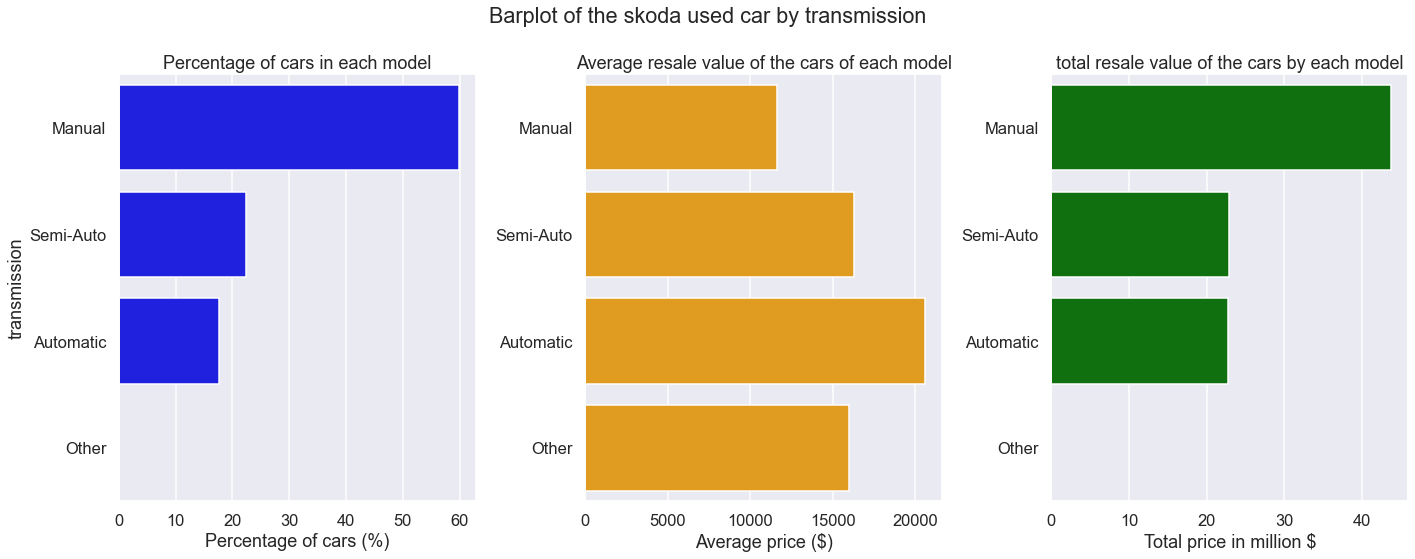

In [41]:
plt.figure(figsize=(20,8))

##### By model
plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=data_trans.index, data=data_trans, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")


plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=data_trans.index, data=data_trans, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=data_trans.index, data=data_trans, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the skoda used car by transmission")
plt.tight_layout()
plt.show()

##### Observation:
- There are 4 different types of transmission type: Manual, Semi-auto, Automatic and Other
- From the above barplots, it's clear that the dataset contains most amount of data about the Manual cars (60%)
- If we look at the average selling price of a car by transmission type, Automatic cars have the largest selling price of $20609.33 followed by Semi-auto ($ 16285.11), Other ($ 15999.00) and Manual (11658.52)

- Total selling price of Manual cars \$43.77M, Semi-Auto \\$22.93M, Automatic $22.75M and Other \$0.02M

#### Data aggregation and preprocessing by fuelType

In [42]:
#Group By fuelType
data_fuel = data.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

# sort the dataframe based on the column 'count'
data_fuel = data_fuel.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
data_fuel['percent_of_cars'] = (data_fuel['count']/data_fuel['count'].sum())*100

# convert the 'sum' column in millions
data_fuel['sum'] = data_fuel['sum']/1000000

# keep up to two decimal points
data_fuel = data_fuel.round(2)

# remove the 'count' column
data_fuel = data_fuel.drop('count', axis=1)

display(data_fuel.head())

,mean,sum,percent_of_cars
fuelType,,,
Petrol,13206.08,55.08,66.55
Diesel,16280.82,33.69,33.01
Hybrid,31225.94,0.56,0.29
Other,14957.78,0.13,0.14


#### Barplot: Percentage of cars, Average and Total selling price of cars by fuelType

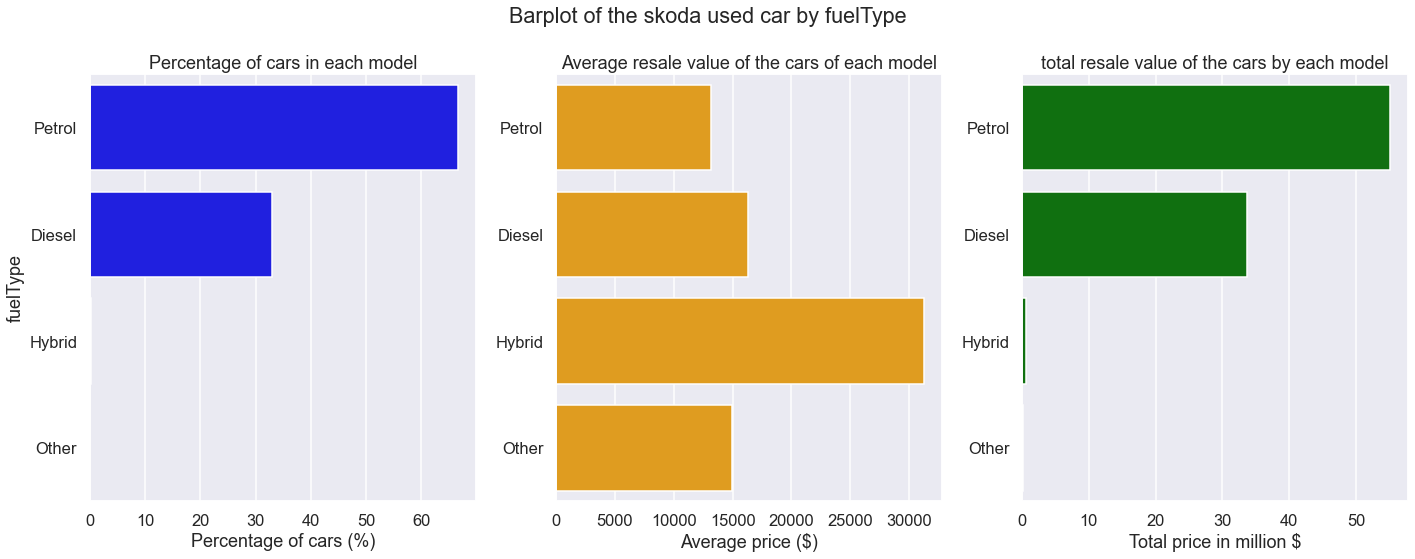

In [43]:
plt.figure(figsize=(20,8))

##### By model
plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=data_fuel.index, data=data_fuel, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")


plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=data_fuel.index, data=data_fuel, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=data_fuel.index, data=data_fuel, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the skoda used car by fuelType")
plt.tight_layout()
plt.show()

##### Observation:
- In this datset, most of the skoda cars are Petrol (66.55%) based and followed by Diesel (33.01).
- Average price of a Hybrid car $31225.94 is greater than other fuel types
- Total selling price of cars by fuelType: Petrol based cars \$55.08M, and Diesel based cars \\$33.69M